<a href="https://colab.research.google.com/github/nathanielgtg/Facial-Expressions-Recognition-Using-Convolutional-Neural-Network/blob/EfficientNet/EfficientNet_64x64_lr(0_000003)_Nadam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/Colab-Notebook

/content/drive/My Drive/Colab-Notebook


In [ ]:
ls

CK+48/  model_plot.png


In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from keras import backend as K
from imutils import paths
from keras.layers import Dropout
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("CK+48")
data = []
labels = []

[INFO] loading images...


In [ ]:
for imagePath in imagePaths:
  image = Image.open(imagePath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [ ]:
np.array(labels).shape

(1754,)

In [ ]:
print(labels)

['surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'su

In [ ]:
np.array(data).shape

(1754, 64, 64)

In [ ]:
# data=np.squeeze(data,axis=1)

In [ ]:
data=np.expand_dims(data,axis=3)
data.shape

(1754, 64, 64, 1)

In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),
	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(1315, 64, 64, 1)
(439, 64, 64, 1)


In [ ]:
trainY.shape

(1315,)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.fit_transform(testY)
print(testY)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [ ]:
# #MODEL 1
# # define our Convolutional Neural Network architecture
# model = Sequential()
# model.add(Conv2D(64, (3, 3), padding="same", input_shape=(32, 32, 3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(32, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(16, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Flatten())
# model.add(Dense(4))
# model.add(Activation("softmax"))

In [ ]:
!pip install -U --pre efficientnet

In [ ]:
from efficientnet.tfkeras import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
# from tensorflow.keras.applications.efficientnet import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7

In [ ]:
import tensorflow as tf
base_model=tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=None,
    classes=7
)

In [ ]:
# # get base models
# base_model = EfficientNetB0(
#     input_shape=(64,64,1),
#     include_top=True,
#     weights='noisy-student',
#     classes=7,
# )

In [ ]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model

In [ ]:
#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation="relu")(x)

predictions = layers.Dense(7, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
labels.shape

(1754, 7)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                            

In [ ]:
from tensorflow.keras.optimizers import Nadam
opt = Nadam(lr=0.000003)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


In [ ]:
# import tensorflow as tf
# class myCallback(tf.keras.callbacks.Callback):
#  def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('val_accuracy')>=0.91):
#       print("\nReached 90.0% accuracy so cancelling training!")
#       self.model.stop_training = True

# callbacks = myCallback()

In [ ]:
#training data
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=200, batch_size=20)

Epoch 1/200
66/66 [==============================] - 86s 628ms/step - loss: 2.0887 - accuracy: 0.1817 - val_loss: 1.9727 - val_accuracy: 0.1162
Epoch 2/200
66/66 [==============================] - 43s 646ms/step - loss: 2.0684 - accuracy: 0.1810 - val_loss: 2.0591 - val_accuracy: 0.1162
Epoch 3/200
66/66 [==============================] - 40s 600ms/step - loss: 1.9989 - accuracy: 0.2091 - val_loss: 2.0791 - val_accuracy: 0.1162
Epoch 4/200
66/66 [==============================] - 39s 597ms/step - loss: 1.9844 - accuracy: 0.2167 - val_loss: 2.2154 - val_accuracy: 0.1185
Epoch 5/200
66/66 [==============================] - 39s 595ms/step - loss: 1.9520 - accuracy: 0.2266 - val_loss: 2.2817 - val_accuracy: 0.1162
Epoch 6/200
66/66 [==============================] - 40s 600ms/step - loss: 1.9075 - accuracy: 0.2373 - val_loss: 2.0270 - val_accuracy: 0.1253
Epoch 7/200
66/66 [==============================] - 39s 597ms/step - loss: 1.8860 - accuracy: 0.2631 - val_loss: 2.0087 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


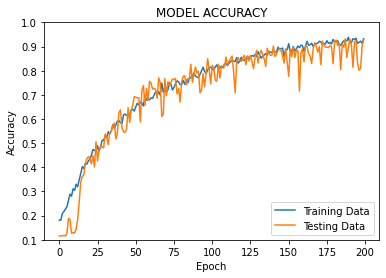

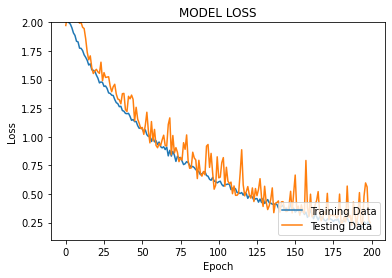

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Testing Data'], loc='lower right')
X = np.linspace(0, 100, 100)
plt.ylim(.1, 1)
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Testing Data'], loc='lower right')
X = np.linspace(0, 100, 100)
plt.ylim(.1, 2)
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
target_names=['angry','disgust','fear','happy','neutral','sad','surprise']
predictions = model.predict(testX, batch_size=32)
print(predictions)
print(testY)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=target_names))

[INFO] evaluating network...
[[2.4262924e-01 3.4987316e-02 9.5793121e-02 ... 1.8680608e-02
  5.6878668e-01 5.7050604e-03]
 [3.6993019e-02 3.3228542e-03 2.4781355e-01 ... 1.7990984e-02
  6.5854287e-01 2.8010806e-02]
 [1.1954609e-02 2.9175000e-02 1.3263323e-02 ... 1.3219190e-01
  5.5145171e-02 1.7375531e-02]
 ...
 [2.8856145e-04 1.7081902e-03 1.2242021e-03 ... 3.1062874e-03
  2.0987699e-03 1.1861482e-04]
 [1.7910586e-04 1.5015900e-03 8.6376512e-01 ... 2.8041849e-04
  9.1692388e-02 1.0407947e-02]
 [4.2664827e-04 2.0531819e-03 4.7875275e-03 ... 9.6743600e-04
  9.5896363e-01 2.2383645e-02]]
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
              precision    recall  f1-score   support

       angry       0.90      0.89      0.89        62
     disgust       0.96      0.88      0.92        74
        fear       0.94      0.97      0.96        66
       happy       0.91      0.94      0.92        64
     neutral    

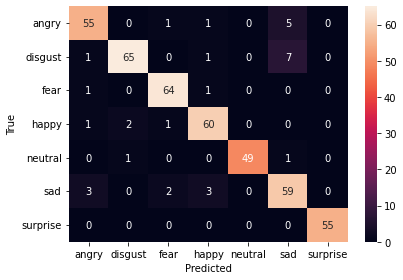

In [ ]:
import sklearn.metrics as metrics
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(testY.argmax(axis=1),predictions.argmax(axis=1))
x_axis_labels = ['angry','disgust','fear','happy','neutral','sad','surprise']
y_axis_labels = ['angry','disgust','fear','happy','neutral','sad','surprise']
sn.heatmap(confusion_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()